https://www.kaggle.com/code/scratchpad/notebookcac7f6dc90/edit


Decision Tree

In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [16]:
bank = pd.read_csv('bank_marketing.csv')

In [17]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

bank client data:
1. age (numeric)
2. job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. balance (numeric)
7. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
8. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: ‘cellular’,’telephone’)
10. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
11. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
17. y: yes, no - Dependent variable

In [18]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [20]:
bank.shape

(45211, 17)

In [21]:
# Checking if null values are present in the dataset
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

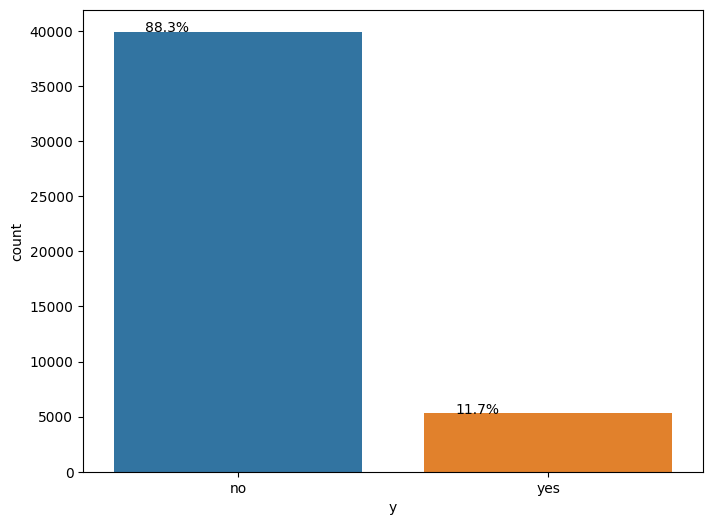

In [22]:
# Check if the dataset is balanced or not
plt.figure(figsize = (8,6))
total = len(bank["y"])
ax = sns.countplot(x = 'y', data = bank)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> From the above plot we can say that the dataset is almost balanced.</p>

## Univariate Analysis of Categorical Variables

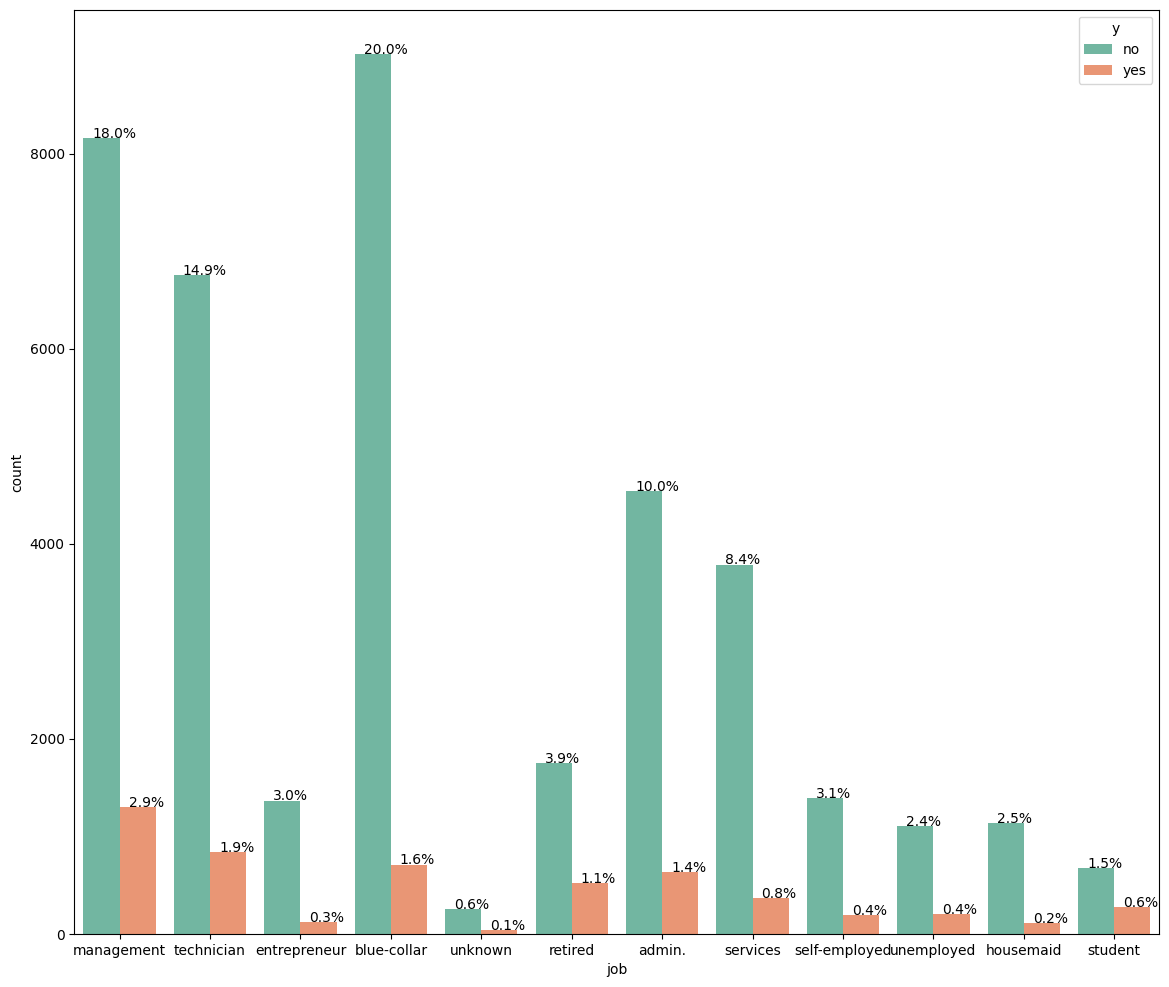

In [23]:
plt.figure(figsize = (14,12))
total = len(bank["job"])
ax = sns.countplot(x = 'job', data = bank, hue = 'y', palette = 'Set2')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> Customers who have a job of management has higher rate of subscribing to term y, but they are also the 
 highest when it comes to not subscribing. This is simply because we have more customers working as 
 management than any other profession.</p>


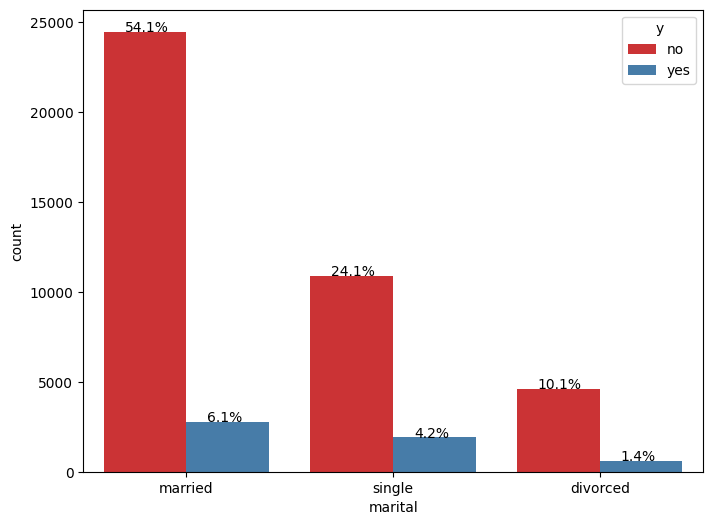

In [24]:
plt.figure(figsize = (8,6))
total = len(bank["marital"])
ax = sns.countplot(x = 'marital', data = bank, hue = 'y', palette = 'Set1')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> Majority of the customers are married followed by single and divorced.</p>

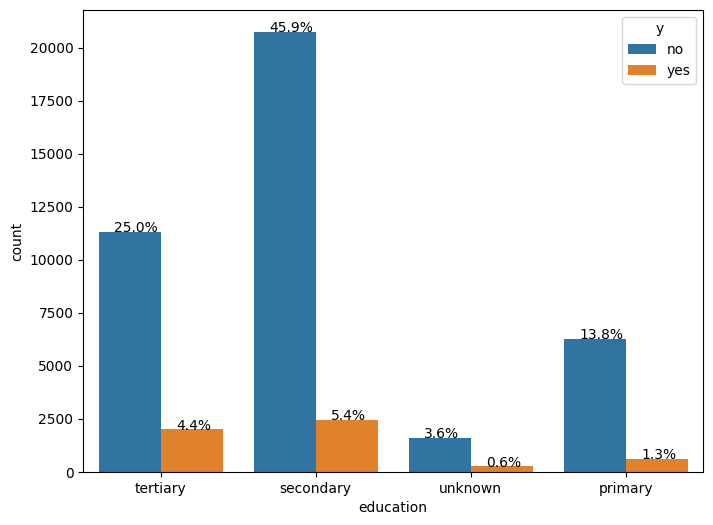

In [25]:
plt.figure(figsize = (8,6))
total = len(bank["education"])
ax = sns.countplot(x = 'education', data = bank, hue = 'y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> People who have a secondary education subscribe less to term y followed by tertiary, unknown and primary education.</p> 

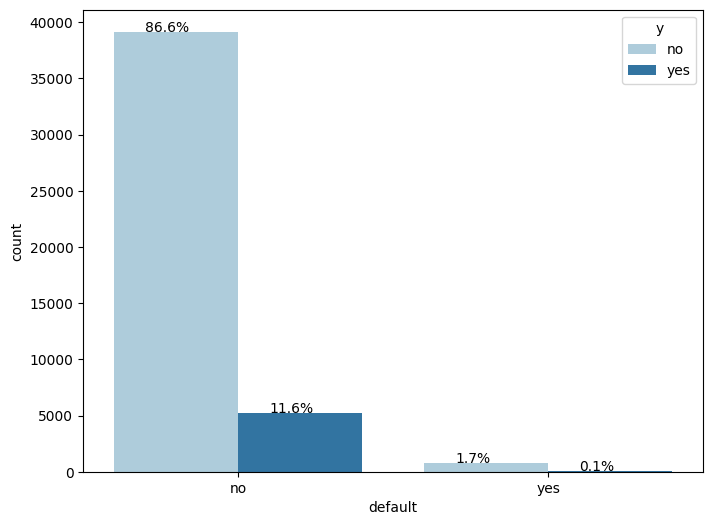

In [26]:
plt.figure(figsize = (8,6))
total = len(bank["default"])
sns.set_palette("Paired")
ax = sns.countplot(x = 'default', data = bank, hue = 'y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> There is a uniform distribution among customers who do no have credit in default.Therefore this feature contribute less in predecting weather a customer will subscribe to term y or not.</p> 

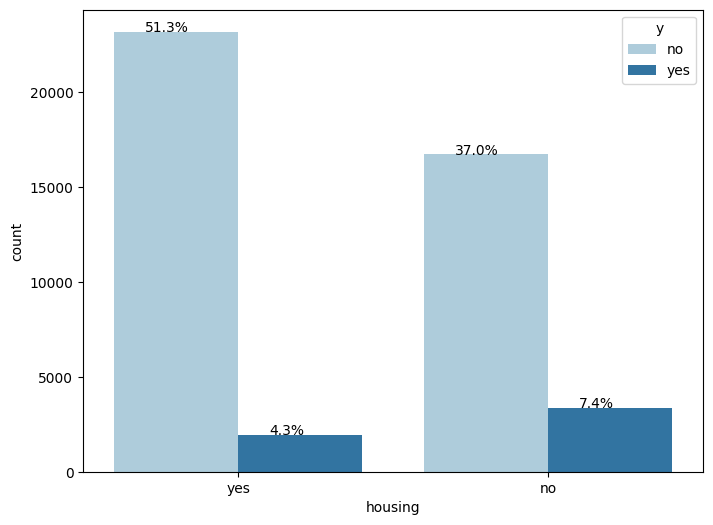

In [27]:
plt.figure(figsize = (8,6))
total = len(bank["housing"])
ax = sns.countplot(x = 'housing', data = bank, hue = 'y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> Customers who have housing loan has lower rate of subscribing to term y.</p>

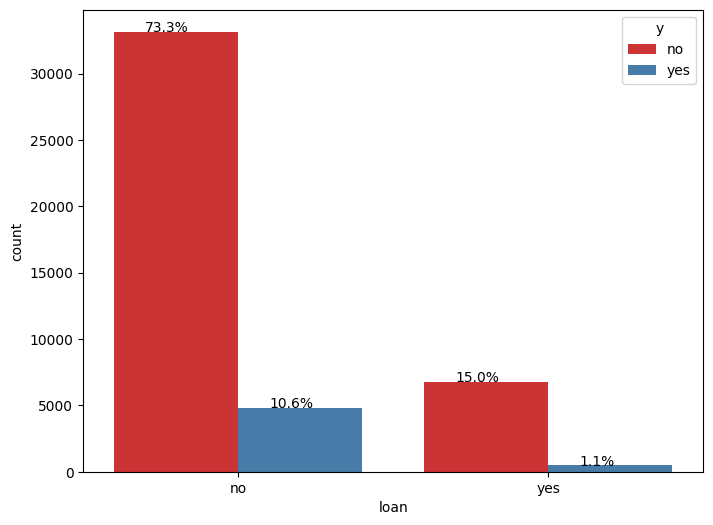

In [28]:
plt.figure(figsize = (8,6))
total = len(bank["loan"])
ax = sns.countplot(x = 'loan', data = bank, hue = 'y', palette = 'Set1')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> People who have not taken loan are more in number.Therefore people who have not taken loan are more likely to
    subscribe to term y.</p>

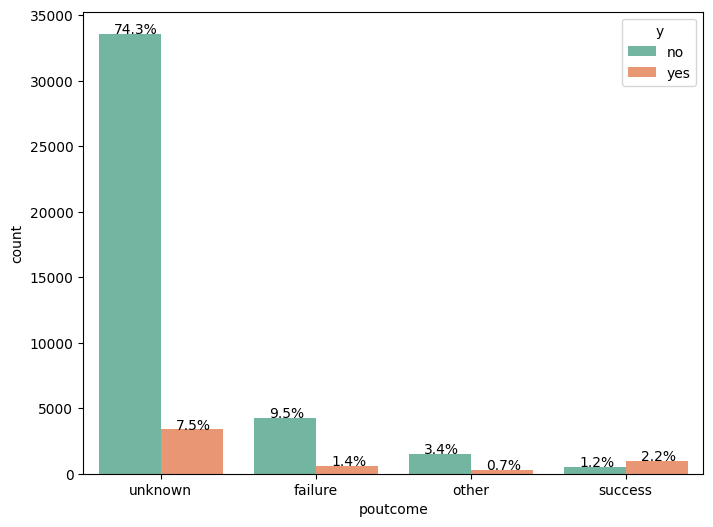

In [29]:
plt.figure(figsize = (8,6))
total = len(bank["poutcome"])
ax = sns.countplot(x = 'poutcome', data = bank, hue = 'y', palette='Set2')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> Majority of the people who have subscribed to term y does not have previous marketing outcome which means 
that they are new customers.Also, customers who had a successful outcome from the previous campaign, majority of those
customers did subscribe for a term y.From this, we can make an assumption, that this feature may hold some value in predicting the target variable, specially poutcome_success category.</p>

In [30]:
fig = px.histogram(bank, x = "day", y = "day", color = "y")
fig.show()

<p>From the above plot we can see that it is a uniform distribution plot.Thus, we can conclude that this feature will not be very helpful in predicting the target variable.</p> 

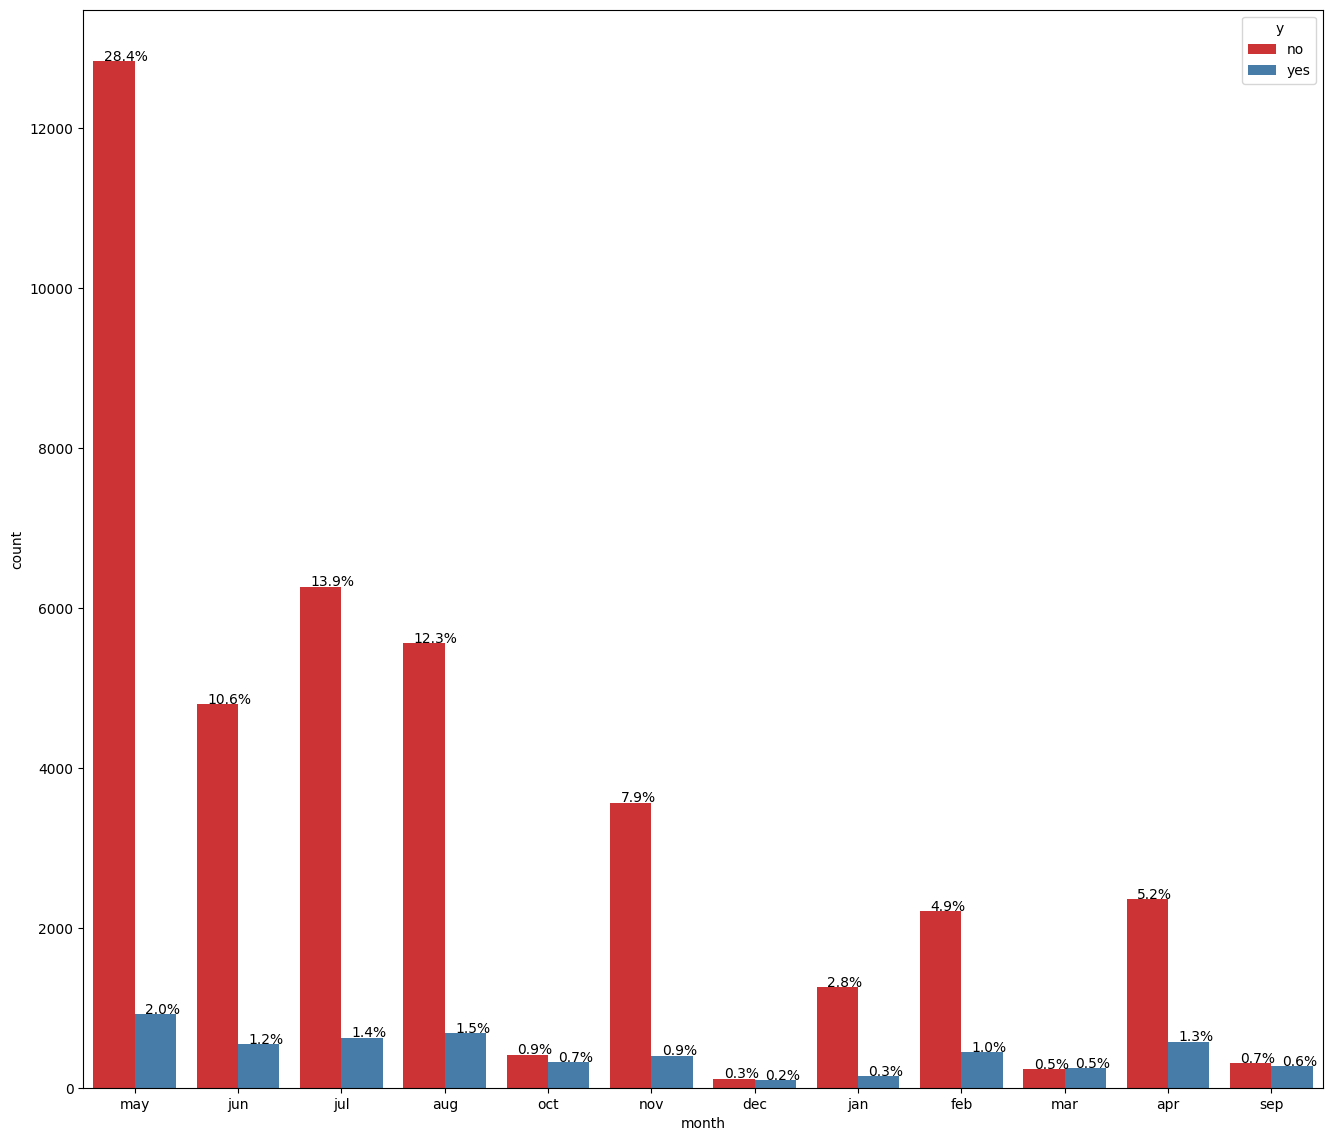

In [31]:
plt.figure(figsize = (16,14))
total = len(bank["month"])
ax = sns.countplot(x = 'month', data = bank, hue = 'y', palette='Set1')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

<p> In the month of May followed by August, July and April more number of people subscribe to term y.</p>

## Univariate Analaysis on Numerical features

In [32]:
fig = px.box(x = bank["y"], y = bank["age"])
fig.show()

<p>From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term y, has a median age of around 38–39. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.</p>

C:\Users\donghuna\AppData\Local\Temp\ipykernel_18428\2838992595.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

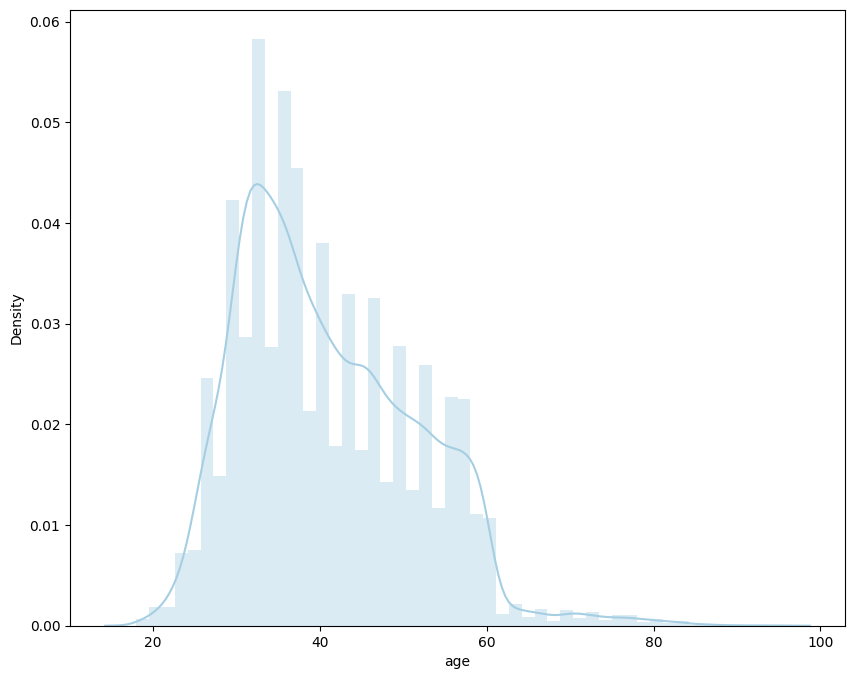

In [33]:
plt.figure(figsize = (10,8))
sns.distplot(bank["age"])

In [34]:
fig = px.box(x = bank["y"], y = bank["balance"])
fig.show()

<p> Similar to age feature even balance feature doesn't contribute much to target feature.</p>

<p>Duration attribute highly affects the target attribute(e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</p>

<p>we know that we will not be able to include this feature in our final models, as obviously we want to create a realistic predictive model that can be used by the business. But, we will surely implement a basic model with the duration feature just to see how much of an impact this feature makes. So with that, let’s look into the box plot and pdf of this feature.</p>

In [35]:
fig = px.box(x = bank["y"], y = bank["duration"])
fig.show()

C:\Users\donghuna\AppData\Local\Temp\ipykernel_18428\2071241240.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='duration', ylabel='Density'>

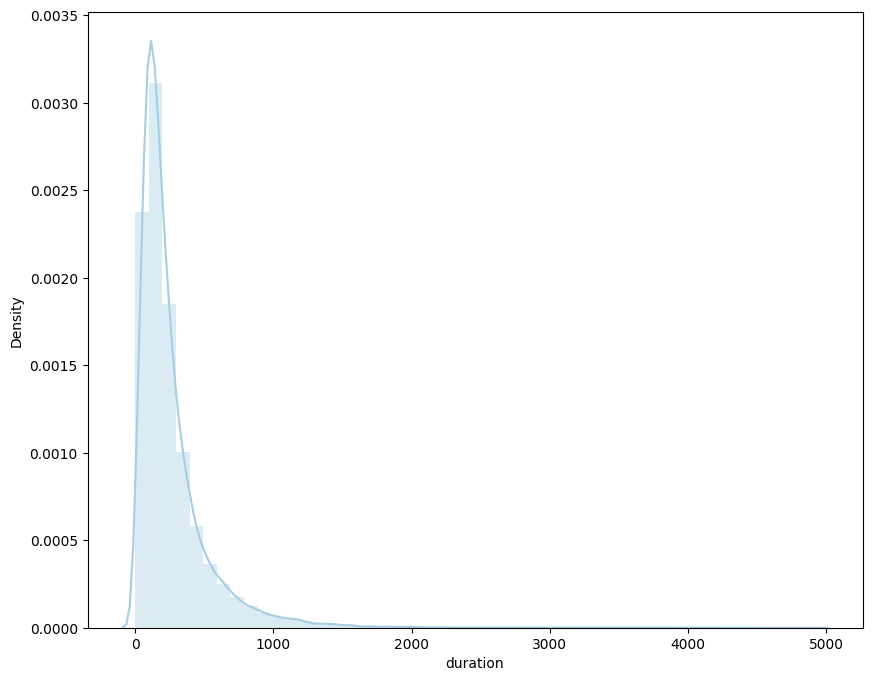

In [36]:
plt.figure(figsize = (10,8))
sns.distplot(bank["duration"])

<p>From the above plot we can see that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.</p>

In [37]:
fig = px.box(x = bank["y"], y = bank["campaign"])
fig.show()

<p>We can infer that, number of contacts performed during this campaign for a client does not contribute much in predicting wether he will subscribe or not subscribe to term y.

In [38]:
fig = px.violin(bank, x=bank["pdays"], y=bank["y"], color = bank["y"])
fig.show()

In [39]:
fig = px.histogram(bank, x="pdays", color = bank["y"], nbins = 15)
fig.show()

<p>We can see that number of days passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)is between 3 - 6 months then there is a high chance of client subscribing to term y.If the client is contacted many days ago or not contacted at all then the client subscribing to term y is likely less.Therefore to some extent this feature will help in determing target feature.</p>

In [40]:
fig = px.histogram(bank, x="previous", color = "y", nbins = 10)
fig.show()

<p>Number of contacts performed before this campaign and for this client or previous feature is not a good indicator of target variable.</p>

C:\Users\donghuna\AppData\Local\Temp\ipykernel_18428\3111361189.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Pearson Correlation of Features')

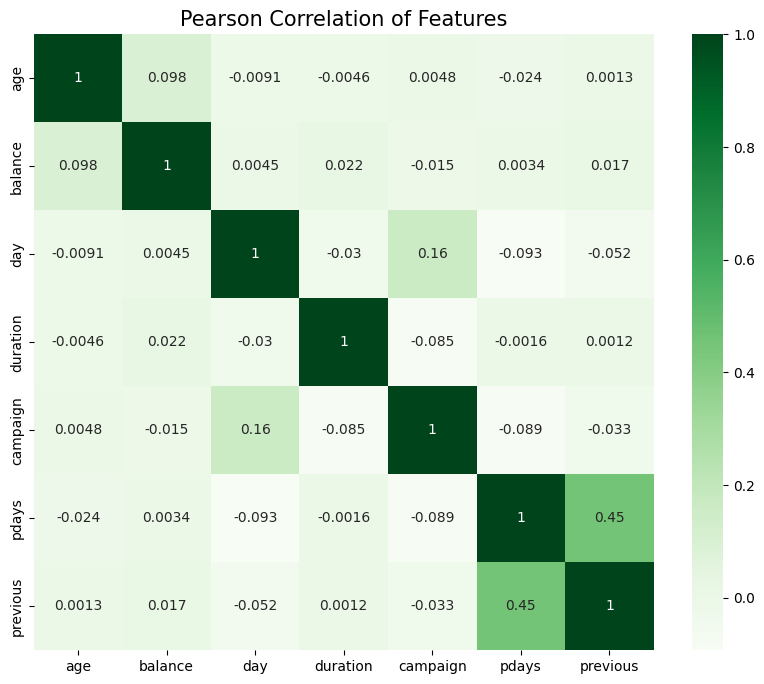

In [41]:
plt.figure(figsize = (10,8))
corr = bank.corr()
sns.heatmap(corr, annot = True, cmap = "Greens")
plt.title("Pearson Correlation of Features", size = 15)

<p> Pdays and Previous feature have high correlation of 0.51.</p>

#### Check if there are any duplicate values

In [42]:
bank[bank.duplicated()].sum()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

### Data Preprocessing

In [43]:
# Remove contact column as it does not affect much in predicting target feature
bank = bank.drop(columns = "contact", axis = 1)
bank.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47   blue-collar  married    unknown      no     1506     yes   no    5   
4   33       unknown   single    unknown      no        1      no   no    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       261         1     -1         0  unknown  no  
1   may       151         1     -1         0  unknown  no  
2   may        76         1     -1         0  unknown  no  
3   may        92         1     -1         0  unknown  no  
4   may       198         1     -1         0  unknown  no

In [44]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
bank['y'] = labelEncoder.fit_transform(bank['y'])
bank['marital'] = labelEncoder.fit_transform(bank['marital'])
bank['education'] = labelEncoder.fit_transform(bank['education'])
bank['default'] = labelEncoder.fit_transform(bank['default'])
bank['housing'] = labelEncoder.fit_transform(bank['housing'])
bank['loan'] = labelEncoder.fit_transform(bank['loan'])
bank['poutcome'] = labelEncoder.fit_transform(bank['poutcome'])


In [45]:
bank["month"].value_counts().sort_values(ascending = False).head(20)

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [46]:
bank["job"].value_counts().sort_values(ascending = False).head(20)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [48]:
# Get whole set of dummy variables for all categorical columns
def one_hot_encode_top(df, col, top_6_labels):
    for label in top_6_labels:
        df[col+'_'+label] = np.where(df[col] == label,1,0)
bank_new = pd.read_csv('bank_marketing.csv', usecols = ['job', 'month']) 

In [49]:
# Encode for job column
top_6_labels = [x for x in bank["job"].value_counts().sort_values(ascending = False).head(6).index]
one_hot_encode_top(bank, "job", top_6_labels)
bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management        1          2        0     2143        1     0   
1   44    technician        2          1        0       29        1     0   
2   33  entrepreneur        1          1        0        2        1     1   
3   47   blue-collar        1          3        0     1506        1     0   
4   33       unknown        2          3        0        1        0     0   

   day month  ...  pdays  previous  poutcome  y  job_blue-collar  \
0    5   may  ...     -1         0         3  0                0   
1    5   may  ...     -1         0         3  0                0   
2    5   may  ...     -1         0         3  0                0   
3    5   may  ...     -1         0         3  0                1   
4    5   may  ...     -1         0         3  0                0   

   job_management  job_technician  job_admin.  job_services  job_retired  
0               1               0           0             0            0  
1               0               1           0             0            0  
2               0               0           0             0            0  
3               0               0           0             0            0  
4               0               0           0             0            0  

[5 rows x 22 columns]

In [50]:
# Encode for month column
top_6_labels = [x for x in bank["month"].value_counts().sort_values(ascending = False).head(6).index]
one_hot_encode_top(bank, "month", top_6_labels)
bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management        1          2        0     2143        1     0   
1   44    technician        2          1        0       29        1     0   
2   33  entrepreneur        1          1        0        2        1     1   
3   47   blue-collar        1          3        0     1506        1     0   
4   33       unknown        2          3        0        1        0     0   

   day month  ...  job_technician  job_admin.  job_services  job_retired  \
0    5   may  ...               0           0             0            0   
1    5   may  ...               1           0             0            0   
2    5   may  ...               0           0             0            0   
3    5   may  ...               0           0             0            0   
4    5   may  ...               0           0             0            0   

   month_may  month_jul  month_aug  month_jun  month_nov  month_apr  
0          1          0          0          0          0          0  
1          1          0          0          0          0          0  
2          1          0          0          0          0          0  
3          1          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 28 columns]

In [51]:
# Drop initial job and month categorical column
bank.drop(columns = ["job", "month"], axis =1, inplace = True)
bank.head()

age  marital  education  default  balance  housing  loan  day  duration  \
0   58        1          2        0     2143        1     0    5       261   
1   44        2          1        0       29        1     0    5       151   
2   33        1          1        0        2        1     1    5        76   
3   47        1          3        0     1506        1     0    5        92   
4   33        2          3        0        1        0     0    5       198   

   campaign  ...  job_technician  job_admin.  job_services  job_retired  \
0         1  ...               0           0             0            0   
1         1  ...               1           0             0            0   
2         1  ...               0           0             0            0   
3         1  ...               0           0             0            0   
4         1  ...               0           0             0            0   

   month_may  month_jul  month_aug  month_jun  month_nov  month_apr  
0          1          0          0          0          0          0  
1          1          0          0          0          0          0  
2          1          0          0          0          0          0  
3          1          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 26 columns]

In [52]:
bank.shape

(45211, 26)

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   marital          45211 non-null  int32
 2   education        45211 non-null  int32
 3   default          45211 non-null  int32
 4   balance          45211 non-null  int64
 5   housing          45211 non-null  int32
 6   loan             45211 non-null  int32
 7   day              45211 non-null  int64
 8   duration         45211 non-null  int64
 9   campaign         45211 non-null  int64
 10  pdays            45211 non-null  int64
 11  previous         45211 non-null  int64
 12  poutcome         45211 non-null  int32
 13  y                45211 non-null  int32
 14  job_blue-collar  45211 non-null  int32
 15  job_management   45211 non-null  int32
 16  job_technician   45211 non-null  int32
 17  job_admin.       45211 non-null  int32
 18  job_se

<p> All categorical columns are converted into numeric columns</p>

In [54]:
# Rearranging columns
bank = bank[["age", "balance", "day", "campaign", "duration", "pdays", "previous", "marital", "education", 
             "default", "housing", "loan", "poutcome", "job_management", "job_blue-collar", "job_technician",
             "job_admin.", "job_services", "job_retired", "month_may", "month_aug", "month_jul", "month_jun", "month_nov",
             "month_apr", "y"]]

In [55]:
X = bank.iloc[:, :25]
y = bank.iloc[:, -1]

### Splitting dataset into train and test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (36168, 25)
X_test:  (9043, 25)
y_train:  (36168,)
y_test:  (9043,)


In [57]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy score of training data: ", acc_train)
print("Accuracy score of test data: ", acc_test)

Accuracy score of training data:  1.0
Accuracy score of test data:  0.8666371779276789


### Visualizing Decision Tree

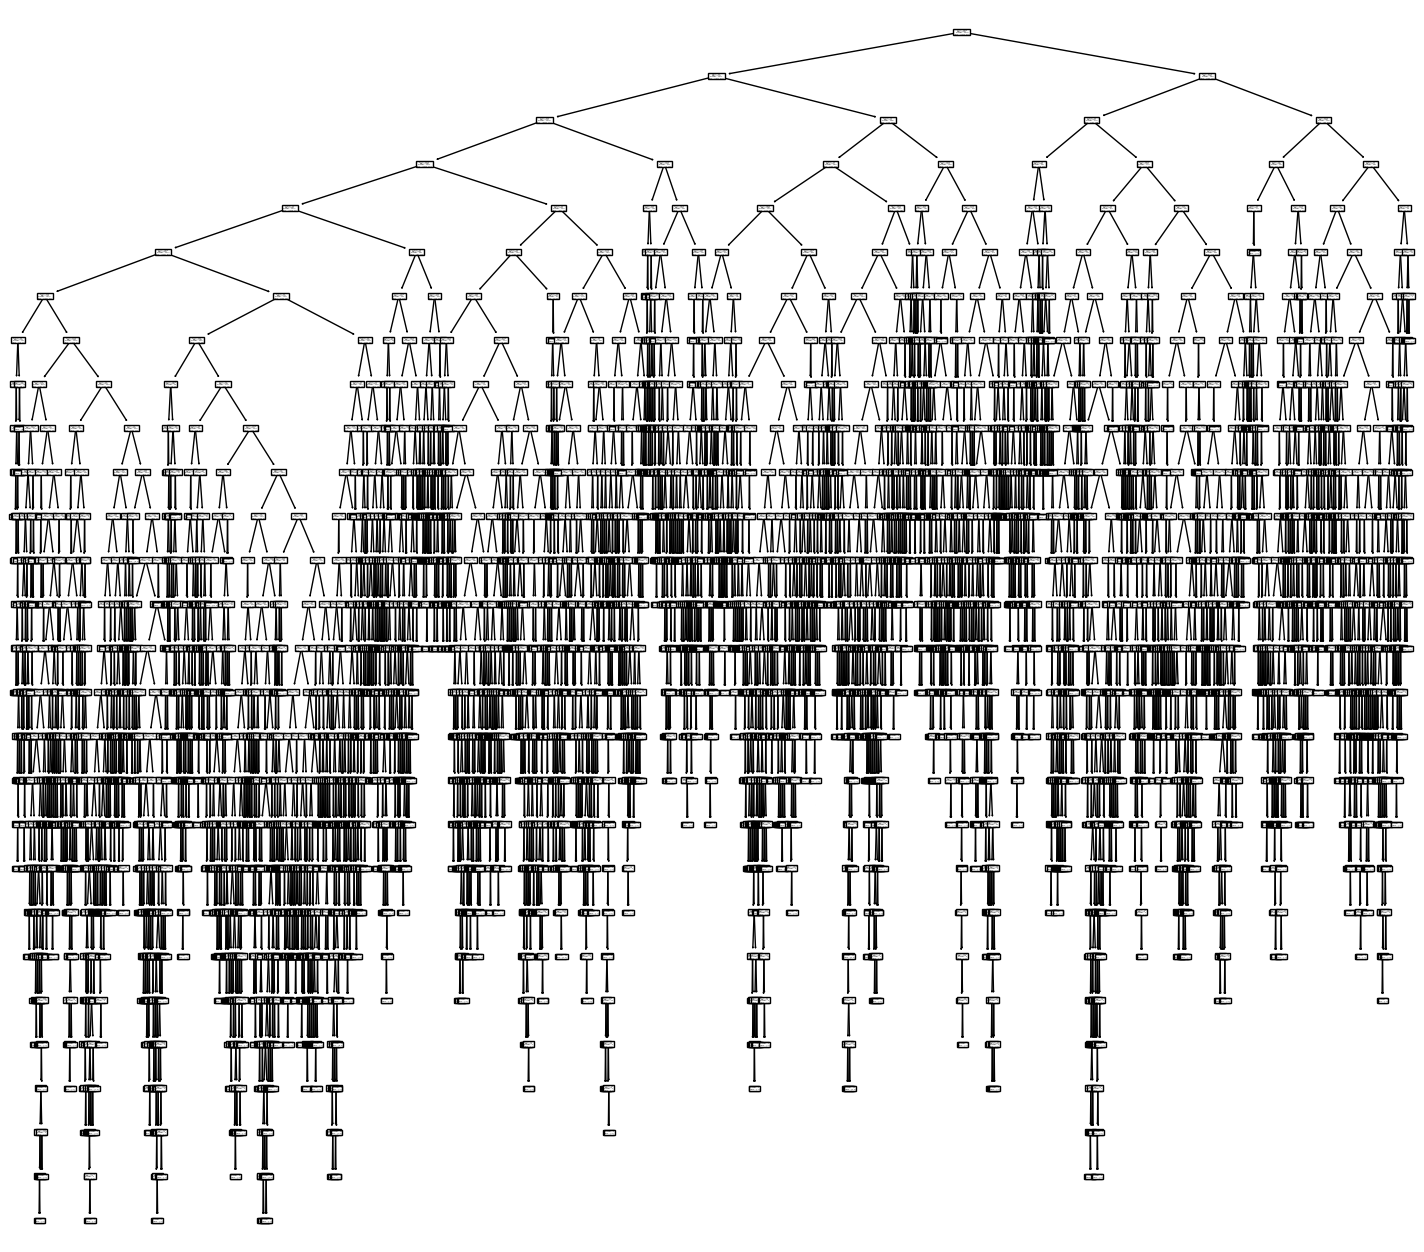

In [58]:
plt.figure(figsize = (18, 16))
tree.plot_tree(clf)
plt.show()

### Post Pruning Operation

In [59]:
# Using cost_complexity_pruning technique to prune the branches of decision tree
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha values :",ccp_alphas)
print()
print("Impurities in Decision Tree :",impurities)

ccp alpha values : [0.00000000e+00 9.19800009e-06 1.36741102e-05 ... 2.93936279e-03
 8.92231674e-03 2.53482959e-02]

Impurities in Decision Tree : [0.00000000e+00 5.51880006e-05 1.09884441e-04 ... 1.63274190e-01
 1.81118823e-01 2.06467119e-01]


In [60]:
# Taking ccp_alphas as one of the parameter in DecisionTreeClassifier()
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.025348295883509786


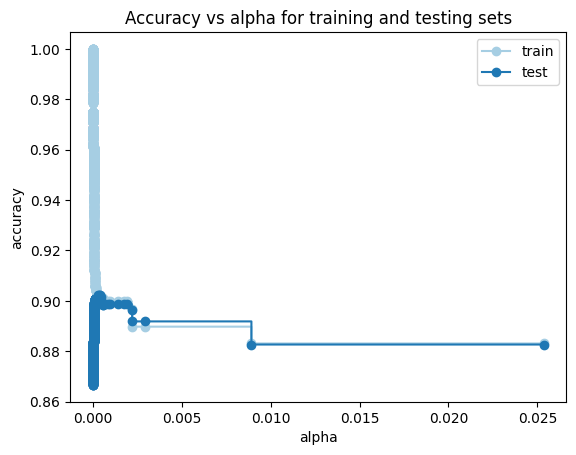

In [61]:
# Visualizing the accuracy score for train and test set.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

If we folow bias and variance tradeoff we will choose that point which will have low bias(low training error) and low variance(low test error).Here we get that point at a value of alpha=0.001.

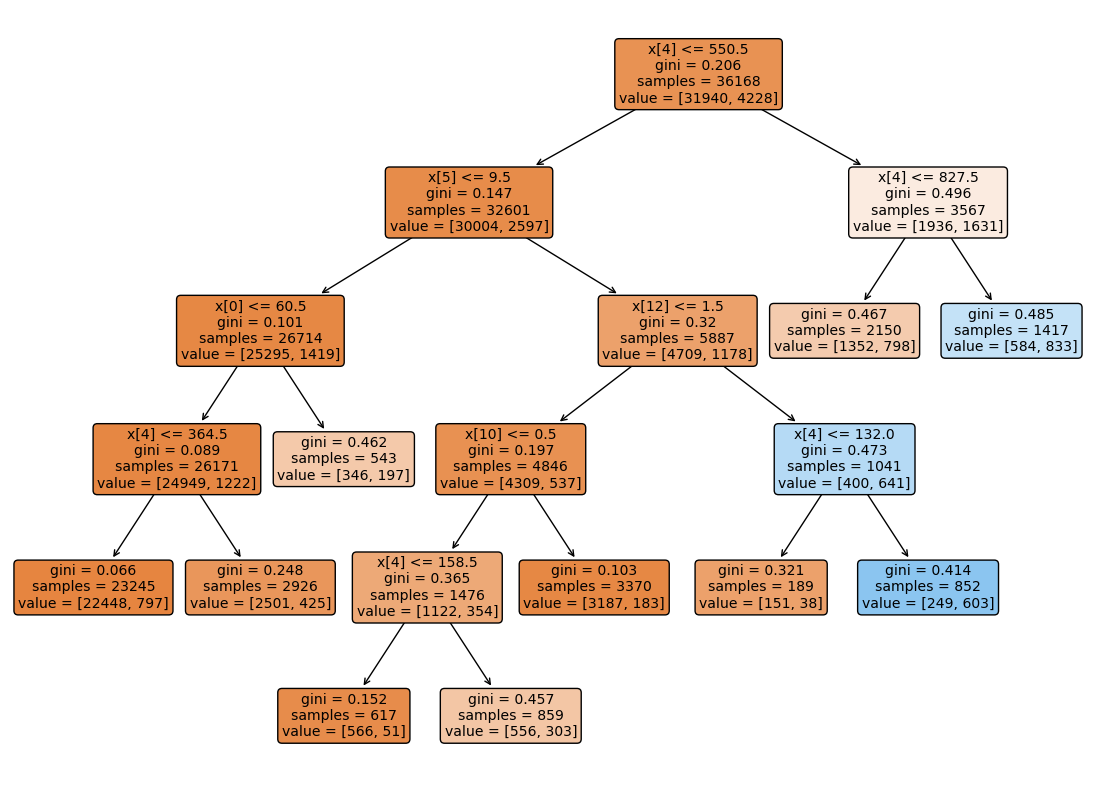

In [62]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf.fit(X_train,y_train)
plt.figure(figsize=(14,10))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

Here we are able to prune infinitely grown tree.Let’s check the accuracy score again

In [63]:
accuracy_score(y_test,clf.predict(X_test))

0.8987061815769103

In [64]:
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
x=fpr, y=tpr,
title=f'ROC Curve (Auc = {auc(fpr, tpr):.4f})',
labels=dict(x = 'False Positive Rate', y = 'True Positive Rate'),
width = 700, height = 500)
fig.add_shape(
type = 'line', line = dict(dash='dash'),
x0=0, x1=1, y0=0, y1=1)

auc = 0.87 which means there is a 87% chance that our model will be able to distinguish between positive class and negative class.

### Pre - Pruning

In [65]:
# Using hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(5,15,1),
             "min_samples_leaf":range(5,15,1),
             "min_samples_split":range(5,15,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.001, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(5, 15),
                         'splitter': ['best', 'random']})

In [66]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 5, 'splitter': 'random'}


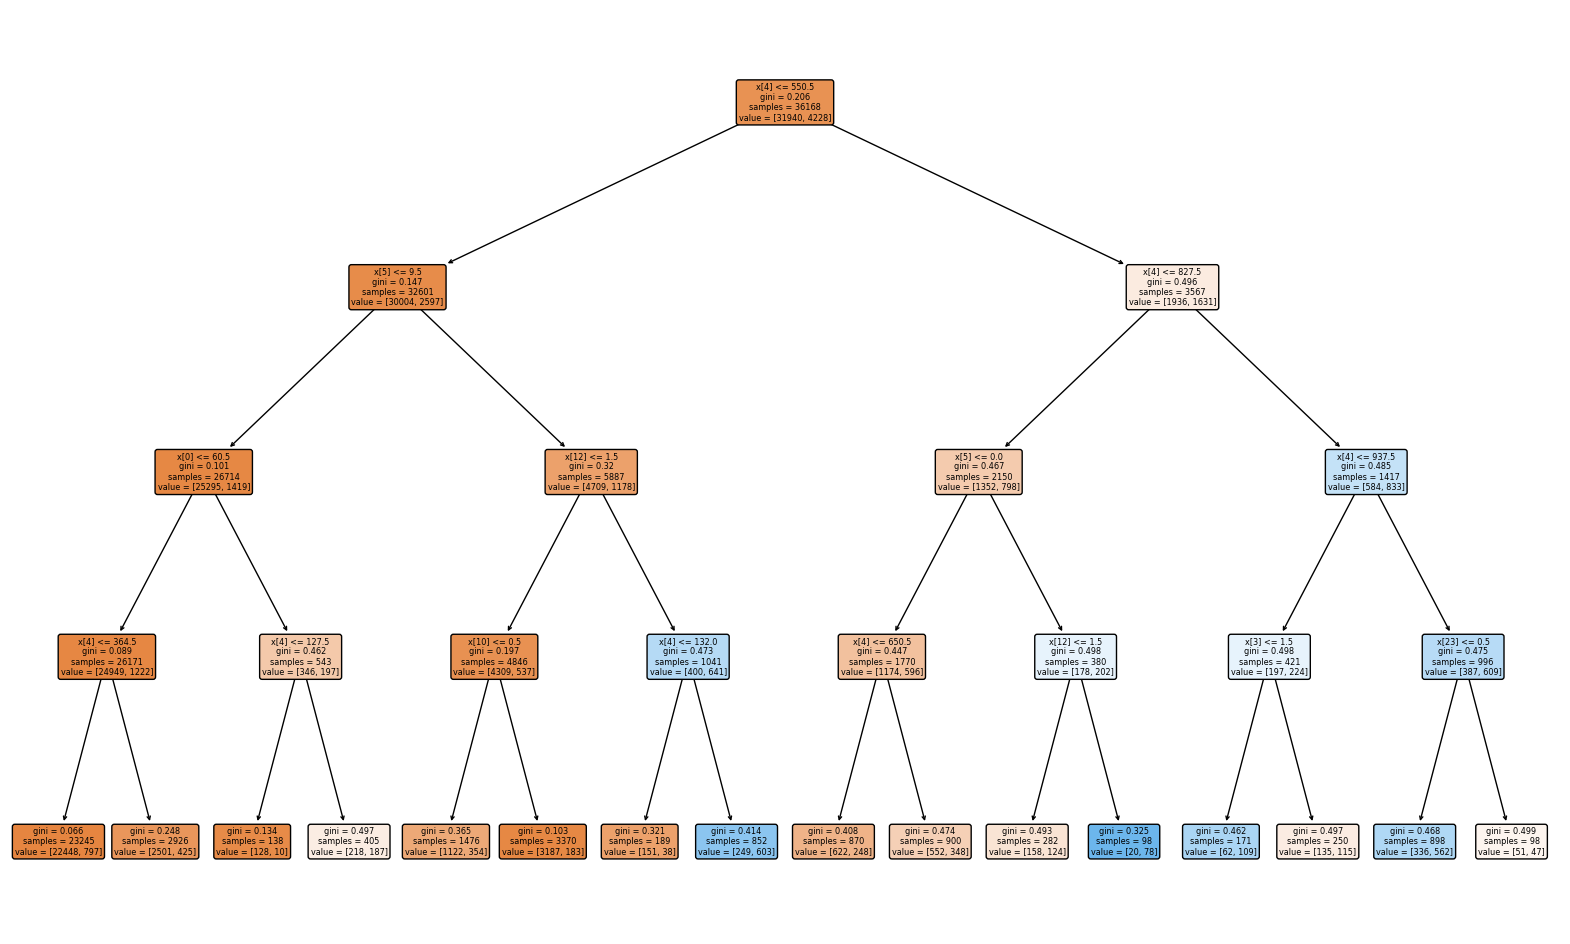

In [67]:
clf=DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [68]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,clf.predict(X_test))

0.8989273471193188

In [69]:
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
x=fpr, y=tpr,
title=f'ROC Curve (Auc = {auc(fpr, tpr):.4f})',
labels=dict(x = 'False Positive Rate', y = 'True Positive Rate'),
width = 700, height = 500)
fig.add_shape(
type = 'line', line = dict(dash='dash'),
x0=0, x1=1, y0=0, y1=1)

auc = 0.86 which means there is a 86% chance that our model will be able to distinguish between positive class and negative class.